<a href="https://colab.research.google.com/github/masher5764/Email-spam-filter/blob/main/Email_Spam_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam Filter

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

**Converting Textual parragraph to numeric**

Count Vectorizer technique

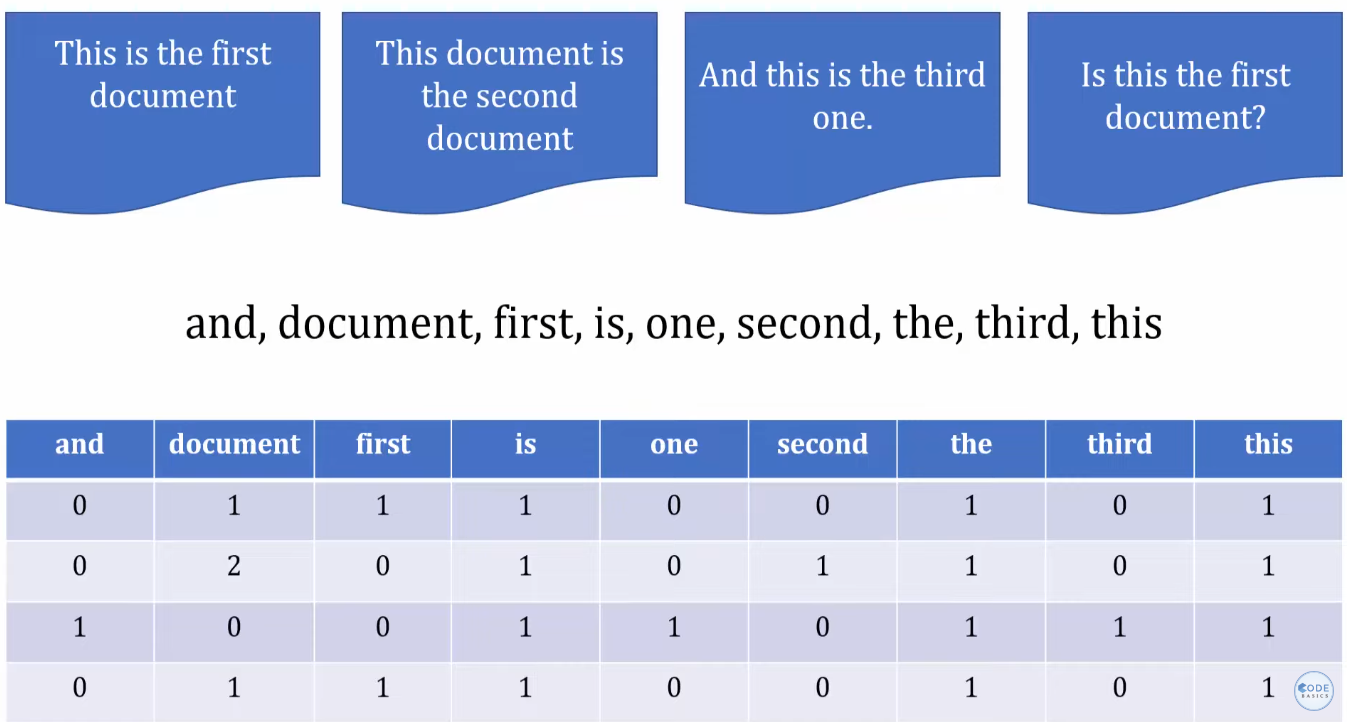

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [ ]:
X_train_count = v.fit_transform(X_train.values)   # transforming the emails to array
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

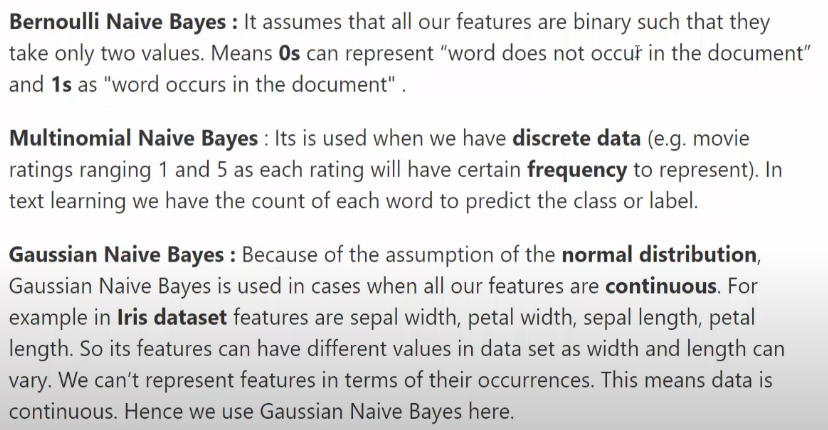

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails) # transforming the emails to array
model.predict(emails_count)

array([0, 1])

In [ ]:
X_test_count = v.transform(X_test)   # transforming the emails to array
model.score(X_test_count, y_test)

0.9863603732950467

**Sklearn Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(X_test,y_test)

0.9863603732950467

In [ ]:
clf.predict(emails)

array([0, 1])